<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo II: Aprendizaje No supervizado: Clustering



# Clustering

> Se le llama “clustering” a la formación de grupos o agrupaciones entre
muestras o entre variables.

> Los “clusters” son formados por datos que cumplen una condición de
agrupación definida en función de algún índice de similitud.

> Los agrupamientos no siempre serán los mismos, ya que depende del tipo de
dato y también depende del tipo de índice de similitud.

> El “Herarchical Clustering” es un algoritmo exhaustivo que realiza la
comparación de todos los datos contra todos. Además es clasificado como un
algoritmo no supervisado, porque no se conoce de antemano los resultados
del proceso de “clustering”.

<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

> Las variables más similares son usadas para crear un cluster o grupo.

> Esto equivale a crear una nueva muestra o nueva variable combinando las similitudes de los pares más similares.
> El criterio más usado es el llamado “complete linkage”.

> Este criterio se basa en crear una nueva muestra o variables eligiendo la máxima similitud del par similar contra los demás datos.

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.cluster import hierarchy

In [2]:
np.random.seed(100)
a = np.random.multivariate_normal([10,10], [[3,0],[0,3]], size = 100)
b = np.random.multivariate_normal([0,20], [[3,0],[0,3]], size = 100)
c = np.random.multivariate_normal([20,20], [[3,0],[0,3]], size = 100)

In [3]:
x = np.concatenate((a,b,c))
x

array([[ 6.96931730e+00,  1.05935399e+01],
       [ 1.19971166e+01,  9.56276796e+00],
       [ 1.16996975e+01,  1.08906532e+01],
       [ 1.03830944e+01,  8.14663059e+00],
       [ 9.67178359e+00,  1.04416755e+01],
       [ 9.20667399e+00,  1.07537253e+01],
       [ 8.98918372e+00,  1.14148206e+01],
       [ 1.11651866e+01,  9.81915459e+00],
       [ 9.07979539e+00,  1.17835493e+01],
       [ 9.24112684e+00,  8.06301598e+00],
       [ 1.28041585e+01,  1.26701385e+01],
       [ 9.56373253e+00,  8.54085850e+00],
       [ 1.03195957e+01,  1.16230740e+01],
       [ 1.12661297e+01,  1.23582844e+01],
       [ 9.43493911e+00,  1.00964337e+01],
       [ 1.03852074e+01,  7.50027484e+00],
       [ 8.68995938e+00,  1.14141398e+01],
       [ 1.12998085e+01,  9.21027676e+00],
       [ 1.20604862e+01,  7.07176576e+00],
       [ 7.65064793e+00,  7.86536080e+00],
       [ 9.05700371e+00,  8.84269260e+00],
       [ 1.00126692e+01,  8.93835897e+00],
       [ 1.22512297e+01,  6.99819033e+00],
       [ 8.

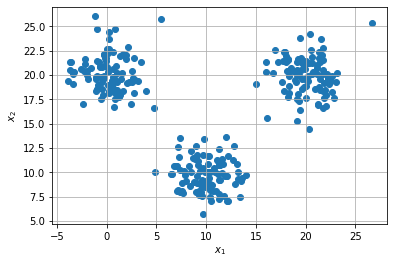

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

In [5]:
help(hierarchy)

Help on module scipy.cluster.hierarchy in scipy.cluster:

NAME
    scipy.cluster.hierarchy

DESCRIPTION
    Hierarchical clustering (:mod:`scipy.cluster.hierarchy`)
    
    .. currentmodule:: scipy.cluster.hierarchy
    
    These functions cut hierarchical clusterings into flat clusterings
    or find the roots of the forest formed by a cut by providing the flat
    cluster ids of each observation.
    
    .. autosummary::
       :toctree: generated/
    
       fcluster
       fclusterdata
       leaders
    
    These are routines for agglomerative clustering.
    
    .. autosummary::
       :toctree: generated/
    
       linkage
       single
       complete
       average
       weighted
       centroid
       median
       ward
    
    These routines compute statistics on hierarchies.
    
    .. autosummary::
       :toctree: generated/
    
       cophenet
       from_mlab_linkage
       inconsistent
       maxinconsts
       maxdists
       maxRstat
       to_mlab_linkag

In [6]:
help(hierarchy.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [7]:
Z = hierarchy.linkage(x, metric='euclidean', method='ward')

In [8]:
len(x)

300

In [9]:
Z.shape

(299, 4)

In [10]:
pd.DataFrame(x)

,0,1
0,6.969317,10.593540
1,11.997117,9.562768
2,11.699697,10.890653
3,10.383094,8.146631
4,9.671784,10.441675
...,...,...
295,20.773926,20.257265
296,23.180579,20.241911
297,16.942595,22.507324
298,18.022381,21.292806


In [27]:
pd.DataFrame(Z).tail(50)

,0,1,2,3
249,167.0,507.0,2.598081,6.0
250,473.0,533.0,2.617996,14.0
251,504.0,531.0,2.792238,12.0
252,456.0,522.0,2.869318,10.0
253,49.0,451.0,2.888943,8.0
254,485.0,506.0,2.891275,5.0
255,490.0,492.0,3.022846,11.0
256,525.0,543.0,3.128767,13.0
257,510.0,553.0,3.137379,13.0
258,511.0,516.0,3.270038,16.0


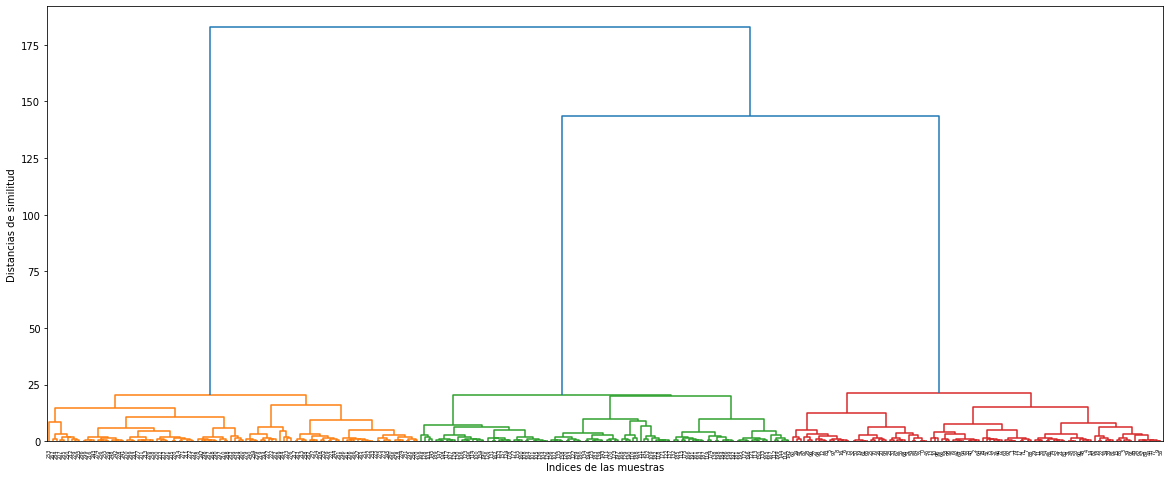

In [12]:
plt.figure(figsize=(20,8))
dn = hierarchy.dendrogram(Z)
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

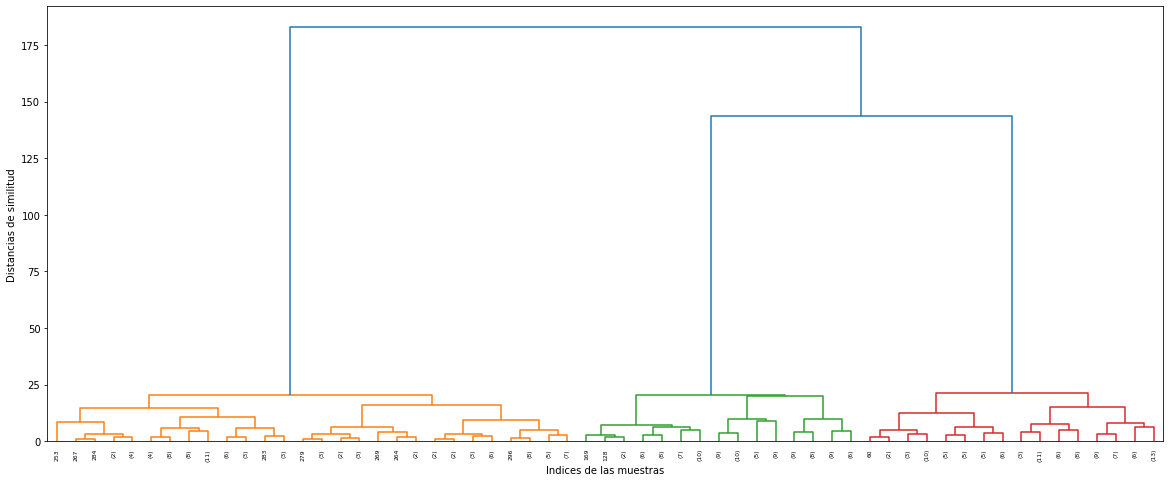

In [14]:
plt.figure(figsize=(20,8))
dn = hierarchy.dendrogram(Z, truncate_mode = 'level', p =5)
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

## Criterios de selección de grupos


En función al dendrograma podemos observar que el número de grupos que se puede obtener son 3


In [35]:
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z, grupos_opt, criterion = 'maxclust')
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [36]:
len(grupos_datos)


300

In [37]:
x.shape

(300, 2)

In [38]:
X = pd.DataFrame(x, columns=['x1','x2'])
X['cluster_dendrograma'] = grupos_datos

In [39]:
X

,x1,x2,cluster_dendrograma
0,6.969317,10.593540,3
1,11.997117,9.562768,3
2,11.699697,10.890653,3
3,10.383094,8.146631,3
4,9.671784,10.441675,3
...,...,...,...
295,20.773926,20.257265,1
296,23.180579,20.241911,1
297,16.942595,22.507324,1
298,18.022381,21.292806,1


In [40]:
X[X['cluster_dendrograma']==1]

,x1,x2,cluster_dendrograma
200,19.657405,18.519663,1
201,20.040872,19.704761,1
202,18.147284,20.391164,1
203,18.497170,20.724716,1
204,16.007176,20.280862,1
...,...,...,...
295,20.773926,20.257265,1
296,23.180579,20.241911,1
297,16.942595,22.507324,1
298,18.022381,21.292806,1


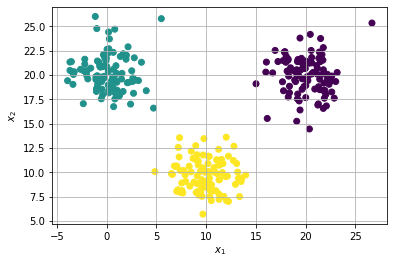

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c = X['cluster_dendrograma'].values)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

## Otros criterios de selección

### Criterio del Codo (1er criterio)


In [43]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,17.0,71.0,0.059228,2.0
3,232.0,233.0,0.066203,2.0
4,210.0,288.0,0.067657,2.0
...,...,...,...,...
294,580.0,593.0,20.460512,100.0
295,590.0,592.0,20.477964,100.0
296,589.0,591.0,21.356080,100.0
297,594.0,596.0,143.716414,200.0


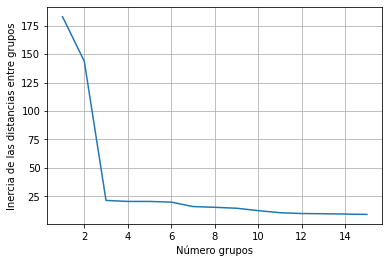

In [46]:
nivel = 15
last = Z[-nivel:,2]
last_rev = last[::-1]
indx_grupos = np.arange(1, len(last)+1)

#Gráfica del criterio del codo
plt.plot(indx_grupos, last_rev)
plt.xlabel('Número grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [47]:
def criterio_codo_clustering_jerarquico(Z, n_grupos):
    last = Z[-n_grupos:,2]
    last_rev = last[::-1]
    indx_grupos = np.arange(1, len(last)+1)

    #Gráfica del criterio del codo
    plt.plot(indx_grupos, last_rev)
    plt.xlabel('Número grupos')
    plt.ylabel('Inercia de las distancias entre grupos')
    plt.grid()
    plt.show()

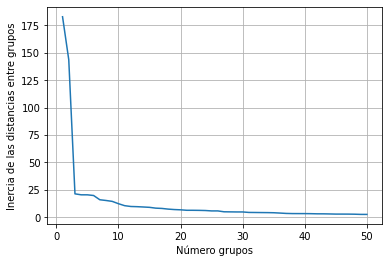

In [50]:
criterio_codo_clustering_jerarquico(Z, 50)

### Criterio del gradiente


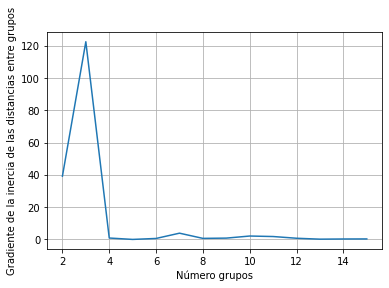

In [51]:
last = Z[-nivel:,2]
gradiente = np.diff(last)
gradiente_rev = gradiente[::-1]
indx_grupos = np.arange(2,len(gradiente_rev) + 2)
#Gráfica del criterio del gradiente
plt.plot(indx_grupos, gradiente_rev)
plt.xlabel('Número grupos')
plt.ylabel('Gradiente de la inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [52]:
def criterio_gradiente_clustering_jerarquico(Z, n_grupos):
    last = Z[-n_grupos:,2]
    gradiente = np.diff(last)
    gradiente_rev = gradiente[::-1]
    indx_grupos = np.arange(2,len(gradiente_rev) + 2)
    #Gráfica del criterio del gradiente
    plt.plot(indx_grupos, gradiente_rev)
    plt.xlabel('Número grupos')
    plt.ylabel('Gradiente de la inercia de las distancias entre grupos')
    plt.grid()
    plt.show()

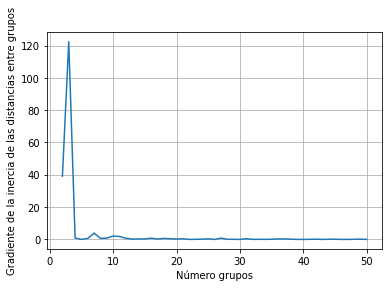

In [55]:
criterio_gradiente_clustering_jerarquico(Z, 50)

## Aplicar número de grupos opt

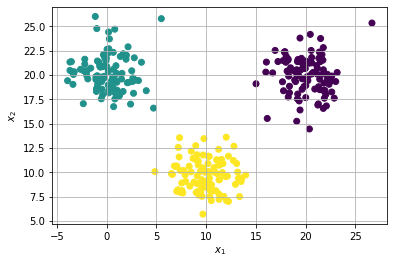

In [56]:
grupos_opt = 3 # Cconcluimos apartir de los criterios del codo y del gradiente que el número opt de grupos es 3
grupos_datos = hierarchy.fcluster(Z, grupos_opt, criterion = 'maxclust')
X = pd.DataFrame(x, columns=['x1','x2'])
X['cluster_dendrograma'] = grupos_datos

plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c = X['cluster_dendrograma'].values)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [57]:
data = pd.read_csv('../Data/shopping-data.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
data_split = data.iloc[:,-2:]
data_split

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [65]:
data_split.values[:,1]

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

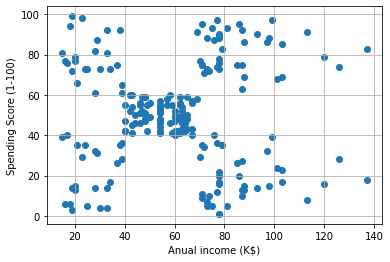

In [62]:
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0], data_split.values[:,1])
plt.xlabel('Anual income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

### Actividad

Aplicar un clustering Jerárquico al conjunto de datos en data_split:

1. Elegir el criterio linkage, métrica de similitud para el clustering
2. Decidir cuántos grupos seleccionar para la clusterización
    - Dendrograma
    - C. Codo
    - C- Gradiente
3. Graficar los datos con la clusterización (con sus grupos correspondientes)